In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
from swdb_2018_neuropixels.ephys_nwb_adapter import NWB_adapter  
drive_path = '/data/dynamic-brain-workshop/visual_coding_neuropixels'
import allensdk.brain_observatory.stimulus_info as si
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
boc =  BrainObservatoryCache()

In [2]:
manifest_file = os.path.join(drive_path,'ephys_manifest.csv')
expt_info_df = pd.read_csv(manifest_file)
multi_probe_expt_info = expt_info_df[expt_info_df.experiment_type == 'multi_probe']
multi_probe_filename = 'ephys_multi_58.nwb'
nwb_file = os.path.join(drive_path,multi_probe_filename)
data_set = NWB_adapter(nwb_file)

In [3]:
# data_set.get_stimulus_table('natural_movie_one')
data_set.stim_tables['natural_movie_one']


,start,end,frame
0,2852.17303,2852.20561,0.0
1,2852.20561,2852.23879,1.0
2,2852.23879,2852.27210,2.0
3,2852.27210,2852.30567,3.0
4,2852.30567,2852.33902,4.0
5,2852.33902,2852.37249,5.0
6,2852.37249,2852.40587,6.0
7,2852.40587,2852.43913,7.0
8,2852.43913,2852.47231,8.0
9,2852.47231,2852.50572,9.0


In [4]:
nwb_dataset = boc.get_ophys_experiment_data(527550473)

2019-03-08 18:48:26,190 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/528017428


(900, 304, 608)


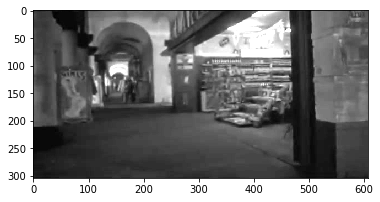

In [5]:
nat_mov_1 = nwb_dataset.get_stimulus_template('natural_movie_one')
print nat_mov_1.shape
plt.imshow(nat_mov_1[40,:,:],cmap='gray')

In [15]:
print len(stim_table[stim_table['frame']==0.0])

20


(900, 304, 608)
(900, 20, 40)


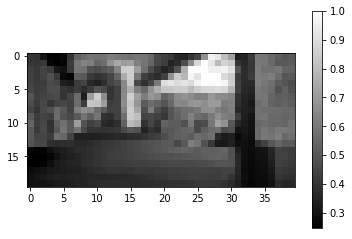

In [6]:
from downsampling_module import downsample_images

print nat_mov_1.shape

ds_nat_mov_1 = np.array(downsample_images(nat_mov_1, 15, 15))
ds_nat_mov_1 = ds_nat_mov_1*(1.0/255.0)

print(ds_nat_mov_1.shape)
plt.imshow(ds_nat_mov_1[7], cmap='gray')
plt.colorbar()

from downsampling_module import flatten_images

flattened_image_list = flatten_images(np.array(ds_nat_mov_1))

plt.imshow(flattened_image_list[40].reshape(ds_nat_mov_1.shape[1:]), cmap='gray')

stim_table = data_set.get_stimulus_table('natural_movie_one')

In [7]:
stim_table

,start,end,frame
0,2852.17303,2852.20561,0.0
1,2852.20561,2852.23879,1.0
2,2852.23879,2852.27210,2.0
3,2852.27210,2852.30567,3.0
4,2852.30567,2852.33902,4.0
5,2852.33902,2852.37249,5.0
6,2852.37249,2852.40587,6.0
7,2852.40587,2852.43913,7.0
8,2852.43913,2852.47231,8.0
9,2852.47231,2852.50572,9.0


In [20]:
def get_frame_at_time(time, stim_table):
    starts = stim_table.start.values
    idx = np.searchsorted(starts, time)-1
    return(stim_table.iloc[idx].values[2])

def get_stim_time_array(stim_table, tns_start, tns_end, bin_len, flattened_image_list):
    T = int(np.floor((tns_end - tns_start)/bin_len))
    time_array = np.linspace(tns_start,tns_end,T)
    stim_array = []
    for idx, time_point in enumerate(time_array):
        stim_index = get_frame_at_time(time_point, stim_table)
        stim_array.append(flattened_image_list[int(stim_index)])
    stim_array = np.array(stim_array).T
    return(stim_array, time_array)

# def get_stim_time_arrays_imgs(stim_table, bin_len, flattened_image_list, imgs, nums):
#     time_arrays = []
#     stim_arrays = []
#     for num in nums:
#         stim_array = []
#         for img in imgs:
#             for i in range(num):   

bin_len = 0.005
num_stim_rows = 8999 #17999  
tns_start = stim_table.iloc[0].values[0]
tns_end = stim_table.iloc[num_stim_rows].values[1]
[stim_array, time_array] = get_stim_time_array(stim_table,tns_start,tns_end,bin_len,flattened_image_list)


In [21]:
def bin_spikes(data_set,bin_len,t_start,t_final,probes=None,regions=None):
    if probes is None:
        probes = data_set.probe_list
    if regions is None:
        regions = data_set.unit_df.structure.unique()
    
    #gather cells from desired regions and probes into cell_table
    use_cells = False
    for probe in probes:
        for region in regions:
            use_cells |= (data_set.unit_df.probe==probe) & (data_set.unit_df.structure==region)
    cell_table = data_set.unit_df[use_cells]
    
    N = len(cell_table)     #number of cells
    T = int(np.floor((t_final-t_start)/bin_len)) #number of time bins
    binned_spikes = np.zeros((N,T)) # binned_spikes[i,j] is the number of spikes from neuron i in time bin j

    #for each cell in the table, add each spike to the appropriate bin
    i = 0
    for z,cell in cell_table.iterrows(): 
        for spike_time in data_set.spike_times[cell['probe']][cell['unit_id']]:
            t = int(np.floor((spike_time-t_start)/bin_len))
            if (t >=0) & (t<T):
                binned_spikes[i,t] += 1
        i+=1    
    return (binned_spikes, cell_table)

(binned_spikes, cell_table) = bin_spikes(data_set,bin_len,tns_start,tns_end,regions=['VISp'])

In [22]:
print stim_array.shape, binned_spikes.shape

(800, 60050) (71, 60050)


In [23]:
np.savez('movie_data',binned_spikes=binned_spikes, stim_array=stim_array, bin_len=bin_len)

In [20]:
import keras
from keras import backend as K
from keras.models import Model
from keras.layers import Input, Add,add, Maximum, Layer, Dense, Lambda
from keras import Sequential
from keras.regularizers import Regularizer
from keras.callbacks import LearningRateScheduler
from scipy.special import gamma
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = ""



In [142]:
#parameter sets shared across predefined classes

def batch_generator_shared(flat_stimulus, binned_spikes, d,neuron=None, batch_size=5000):
    (M,T) = flat_stimulus.shape # M is the size of a stimulus
    if len(binned_spikes.shape)==1:
        binned_spikes = np.expand_dims(binned_spikes,0)
    (N,T) = binned_spikes.shape
    k=d
    if neuron is None:
        neur = 0
    else:
        neur = neuron
    while True:
        idxs = np.arange(k,min(k+batch_size,T))
        y = binned_spikes[neur,idxs]
        X = np.empty((M*d+d+2,idxs.size))
        for i,idx in enumerate(idxs):
            X[:M*d,i] = np.fliplr(np.reshape(flat_stimulus[:,idx-d:idx],[1,-1]))
            X[M*d,i] = 1
            X[M*d+1:-1,i] = np.fliplr(np.reshape(binned_spikes[neur,idx-d:idx],[1,-1]))
            X[-1,i] = neur
        k = k+batch_size
        if k>T:
            k=d
            if neuron is None:
                neur+=1
                if neur==N:
                    neur = 0
        yield X.T, y


class GatedDense(Layer):

    def __init__(self, neuron, output_dim, **kwargs):
        self.neuron = neuron
        self.output_dim = output_dim
        super(GatedDense, self).__init__(**kwargs)

    def build(self, input_shape):
        self.kernel = self.add_weight(name='kernel', 
                                      shape=(self.output_dim, 1), initializer='glorot_uniform',
                                      trainable=True)
        super(GatedDense, self).build(input_shape)  # Be sure to call this at the end

    def call(self, x):
        return K.expand_dims(K.switch(K.equal(float(self.neuron),x[:,-1]),K.squeeze(K.dot(x[:,:self.output_dim],self.kernel),1),K.zeros_like(x[:,-1])))


    def compute_output_shape(self, input_shape):
        return (input_shape[0],1)

def exp_decay(t):
    initial_lrate = 5e-5
    k = 0.9
    lrate = initial_lrate * k**t
    return lrate


# Inputs:
# stimulus: video shown to the mouse in some form (M pixels x T time points)
# spikes: spikes recorded from each neuron in some form (N neurons x T time points)
# d: length of filters in samples
# f: string for the firing rate function used. options are {'exp'}
# priors: a dictionary of dictionaries, mapping a cell type (string of form '<inh or exc>_<region>_<layer>') to a prior (dictionary with keys 'W_means', 'W_vars', 'W_weights' corresponding to GMM parameters)
# cell_types: a list of the cell types for each cell (string of form  '<inh or exc>_<region>_<layer>')

def GLM_shared_fit(stimulus,spikes,d,bin_len,f='exp',priors=None,cell_types=None):    
    N = spikes.shape[0]
    T = spikes.shape[1]
    M = stimulus.shape[0]
    train_end_ind = 3*T/4-10*d
    val_start_ind = 3*T/4+10*d
    bs = 2000
    
    classes = np.unique(cell_types)
    
    F = np.empty((N,M,d)) # stimulus filters
    W = {}
    b = np.empty((N,)) # biases
    train_losses = np.empty((N,))
    val_losses = np.empty((N,))
    models = []
    fs = {'exp':K.exp}
    
    for cls in classes:
        # construct GLM model and return fit
        cls_idxs = np.squeeze(np.argwhere(cell_types==cls))
        cls_spikes = spikes[cls_idxs,:]
        print cls_idxs.size
        inp = Input(shape = (M*d+d+2,))
        x = []
        for idx in range(cls_idxs.size):
            x.append(GatedDense(idx,M*d+1)(inp))
        a = Lambda(lambda val: val[:,M*d+1:-1])(inp)
        x.append(Dense(1,use_bias=False)(a))
        x = Add()(x)
        out = Lambda(lambda val: fs[f](val)*bin_len)(x)
        model = Model(inputs=[inp],outputs=[out])
        model.compile(loss = 'poisson',optimizer = keras.optimizers.adam(lr=5e-5))
        train_gen = batch_generator_shared(stimulus[:,:train_end_ind],cls_spikes[:,:train_end_ind], d,batch_size=bs)
        model.fit_generator(generator = train_gen, 
                            steps_per_epoch = ((train_end_ind-d)/bs+1)*cls_idxs.size,
                            epochs=8,verbose=2,callbacks=[LearningRateScheduler(exp_decay)])
        p = model.get_weights()
        for idx,i in enumerate(cls_idxs):
            F[i,:,:] = p[idx][:-1].reshape((M,d))
            b[i] = p[idx][-1]
            train_gen = batch_generator_shared(stimulus[:,:train_end_ind],cls_spikes[:,:train_end_ind], d, neuron = idx,batch_size=train_end_ind-d)
            train_losses[i] = model.evaluate_generator(train_gen,steps=1)
            val_gen = batch_generator_shared(stimulus[:,val_start_ind:],spikes[:,val_start_ind:], d, neuron = idx, batch_size=T-val_start_ind-d)
            val_losses[i] = model.evaluate_generator(val_gen,steps=1)
        W[cls] = p[-1]

        models.append(model)
    return (F,W,b,train_losses,val_losses,models)


In [137]:
D = np.load('state_save.npz')
cell_types = D['cell_types']

d=30
bin_len = 0.005
(F,W,b,losses,val_losses,models) = GLM_shared_fit(stim_array,binned_spikes[[0,1],:],d, bin_len,cell_types=cell_types[[0,1]])

# (F,W,b,losses,val_losses,models) = GLM_shared_fit(stim_array,binned_spikes[:10,:],d, bin_len,cell_types=cell_types[:10])
# (F,W,b,losses,val_losses,models) = GLM_indiv_fit(stim_array,reduced_binned_spikes,d, bin_len)

2
Epoch 1/8
 - 12s - loss: 0.0796
Epoch 2/8
 - 8s - loss: 0.0833
Epoch 3/8
 - 8s - loss: 0.0790
Epoch 4/8
 - 8s - loss: 0.0786
Epoch 5/8
 - 8s - loss: 0.0768
Epoch 6/8
 - 8s - loss: 0.0774
Epoch 7/8
 - 8s - loss: 0.0769
Epoch 8/8
 - 8s - loss: 0.0766


In [138]:
# print cell_types[[0,1,-2,-3]]
print losses, val_losses

[2.27081455e-05 1.26936749e-01] [1.93734631e-05 9.71943066e-02]
